## Introduction
In this report we will solve a 1D inhomogenous Laplace equation numerically and also find eigenvalues of the time-indpendent Schrodinger equation for a particle in a box numerically and analytically. We will use the central finite difference method to solve these problems and implement a periodic boundary condition for the particle in a box. We also will find eiganvalues for the time-indpendent Schrodinger equation for a particle in a box for the first two band indexes in the first Brillouin zone in 1D

# Problem 1:
# Key Equations:

The following Poisson's equation in 1D
$$
    \frac{d^2}{dx^2} \phi(x) = 2\exp(-x^2),
$$
has the exact solution
$$
    \phi(x) = \sqrt{\pi}\, {\rm erf}\, (x) x + \exp(-x^2) + C_1 x + C_2,
$$
where ${\rm erf}$ is [the error function](http://dlmf.nist.gov/7.2.i) implemented in the library [SpecialFunctions.jl](https://specialfunctions.juliamath.org/v0.1/), $C_1$ and $C_2$ are arbitrary constants. 

Central finite difference method:
$$
\begin{align}
	f'(x) &\approx [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right)  \\
	f''(x) &\approx  [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\left( \Delta x^2 \right). 
\end{align}
$$
Goals:

1) Numerically solve this inhomogenious Laplace's equation by using the central finite-difference method.
2) What values of the constants $C_1$ and $C_2$ should be chosen so that the obtained numerical solutions closely overlaps (on the plot) with the exact solution?


# Solution
The numerical approximation is implemented by generating a grid, calling the second derivative at the grid points then dividing by the step size. 
This solution is backsolved with the original matrix to yield a vector consisting of the numerical approximation. 

Depending on the range used for the numerical approximation, two constants (two steps of integration) are required to fit the exact solution with the numerical solution. 

The two solution vectors are subtracted, yielding a difference vector of C1x+C2. Since our difference vector was constant, C1 was 0, and C2 was 17.76. This was added to the exact equation resulting in perfect overlap. 


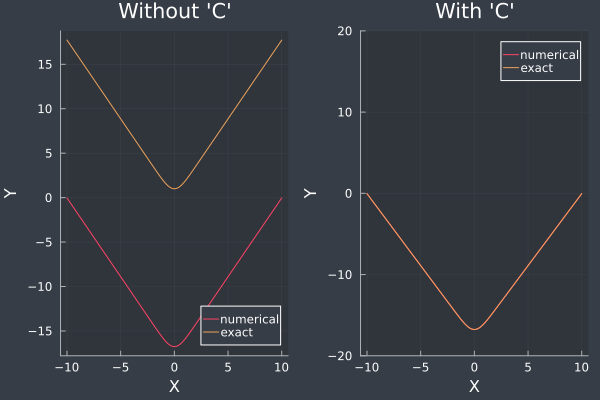

In [11]:
using LinearAlgebra, Plots, SpecialFunctions,Statistics
theme(:dark)
x=collect(-10:.02:10)
Δx=.02
N=length(x)
B = 2 .*exp.(-x.^2)
A = zeros(N,N)
for i in 1:N, j in 1:N
  abs(i-j)<=1 && (A[i,j]+=1)
  i==j && (A[i,j]-=3)
end
A = A/(Δx^2)
numerical_sol=A\B
#
exact_fun=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2)
exact_sol=exact_fun(x)
diff=exact_sol-numerical_sol
c2=mean(diff)
c1=0
exact_fun1=x->sqrt(pi).*erf.(x).*x+exp.(-x.^2) +c1 .*x  .-c2
exact_sol1=exact_fun1(x)
#
pt1=Plots.plot(x,numerical_sol,label="numerical")
Plots.plot!(pt1,x,exact_sol,label="exact",title="Without 'C'",ylabel="Y",xlabel="X")
pt2=Plots.plot(x,numerical_sol,label="numerical")
Plots.plot!(pt2,x,exact_sol1,label="exact",title="With 'C'",ylabel="Y",xlabel="X")
##
ylims!(pt2,-20,20)
display(plot(pt1,pt2))
gui()

# Number 2
The central finite difference method was derived. This method is efficient in optimizing a numerical solution to a differential equation using the central node. The boundary conditions for our original central finite differnece method were as followed:
$\psi(a) = \psi(b)$ and $\psi'(a) = \psi'(b)$.



# Key Equations
The first condition is discretized as 
$$
  \psi(a) = \psi(b) \Longrightarrow \psi(x_0) = \psi(x_N).
$$

Whereas, the second condition is discretized as 
$$
    \psi'(a) = \psi'(b) \Longrightarrow
$$

$$
    \frac{\psi(x_1) - \psi(x_0)}{\Delta x} = \frac{\psi(x_{N+1}) - \psi(x_{N})}{\Delta x}
    \Longrightarrow
$$
$$
    \psi(x_1) - \psi(x_N) = \psi(x_{N+1}) - \psi(x_{N})
    \Longrightarrow
$$
$$
    \psi(x_1) = \psi(x_{N+1}).
$$

## Analytical Solution
Time independent Schrodinger EQ is discretized as:
$$
\begin{align}
	-\frac{\psi(x_{k+1}) - 2\psi(x_{k})  + \psi(x_{k - 1})}{2\Delta x^2} + U(x_k)  \psi(x_{k}) = E  \psi(x_{k}),
	\qquad k=1,1,2,\ldots,N,
\end{align}
$$
Matrix representation of time independent Schrodinger eqaution has periodic boundary condition:

(1)   $$\psi(x_{0}) = \psi(x_{N+1}) = 0$$

In discrete form,

(2)  $$\psi'(a) = \psi'(b)$$
and
$$
    \psi(x_1) = \psi(x_{N+1}).
$$
Central finite difference method:
$$
\begin{align}
	f'(x) &\approx [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\left( \Delta x^2 \right) \Longrightarrow {CentralFinitDiffApprox} \\
	f''(x) &\approx  [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\left( \Delta x^2 \right). 
\end{align}
$$


Listing K values, then adjusting for boundary conditions yields a pattern:

K=1$$-\frac{\psi(x_2) - 2\psi(x_1)+\psi(x_0)}{2\Delta x^2} + U(x_1)  \psi(x_1) = E \psi(x_1)$$

K=2$$\frac{\psi(x_3) - 2\psi(x_2)+\psi(x_1)}{2\Delta x^2} + U(x_2)  \psi(x_2) = E  \psi(x_2)$$
K=...$$...$$\
K=$N-1$ $$\frac{\psi(x_N) - 2\psi(x_{N-1})+\psi(x_{N-2})}{2\Delta x^2} + U(x_{N-1})  \psi(x_{N-1}) = E  \psi(x_{N-1})$$
K=$N$ $$\frac{\psi(x_{N+1}) - 2\psi(x_{N})+\psi(x_{N-1})}{2\Delta x^2} + U(x_N)  \psi(x_N) = E  \psi(x_N)=\frac{\psi(x_{1}) - 2\psi(x_{N})+\psi(x_{N-1})}{2\Delta x^2} + U(x_N)  \psi(x_N)$$

This pattern is represented as a matrix and is the Hermitian finite dimensional approximation of the above Hamiltonian:
\
\
$(\frac{-1}{2\Delta x^2})$ *
$\begin{pmatrix}
-2 & 1       & 0      & 0     & \cdots & 0 & 0  & 0  & 1 \\
1  & -2      & 1      & 0     & \cdots & 0 & 0  & 0  & 0 \\ 
 \ddots  &  \ddots & \ddots & \ddots &    \ddots     &  \ddots  &  \ddots   &  \ddots   &  \ddots  \\
0  & 0       & 0      & 0     & \cdots & 0 & 1  & -2 & 1  \\
1  & 0       & 0      & 0     & \cdots & 0 & 0  & 1  & -2 \\
\end{pmatrix}$
+
$\begin{pmatrix}
U(x_1) &       &       &       &       &          &           &         \\   
       &U(x_2)&       &       &       &          &           &          \\   
       &      &       & \ddots&       &          &           &          \\ 
       &      &       &       & \ddots&          &           &          \\        
       &      &       &       &       &          & U(x_{N-1})&          \\   
       &      &       &       &       &          &           & U(x_{N}) \\
       \end{pmatrix}$
       $\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
\Psi(x_{N-1}) \\
\Psi(x_{N}) \\ \end{pmatrix}$= E
$\begin{pmatrix}
\Psi(x_1) \\
\Psi(x_2) \\
\Psi(x_{N-1}) \\
\Psi(x_{N}) \\ \end{pmatrix}$

Overall, we were able to show how the boundry conditions for central difference method's boundry's change the conditions of the matrix.  

# Problem 3:

Key Equations:

The goal of this questions was to numerically find the eigenenergies of the Schrödinger equation for a particle in the box with the periodic boundary condition and $a=0$ and $b=1$. 

 When plotting this with central finite difference and the boundries of:
 
 $\psi(a) = \psi(b)$ and $\psi'(a) = \psi'(b)$.

 We were then supposed to compare the numerically obtained result with the exact energies, which are: $E_n = 2 (\pi n)^2$, where $n=0, \pm 1, \pm 2, \pm 3, \ldots$.

 For the periodic boundary conditions, the coordinate grid needs to be chosen differently that for the particle-in-the-box case (i.e., not like `range(a, b, N)`). The accurate choice is

$$
    x_m = a + (m - 1)(b - a) / N, \qquad m =1,2, \ldots N.
$$
For these boundry conditions, it is important to remember that $x_N < b$! or this equation will not work

# Solution:

In [6]:
using LinearAlgebra
function energies_Q2(U::Function, a::Real, b::Real, N::Int)
    m=range(1, N, N)
    x = a.+((m.-1).*(b-a)/N)
    Δx = x[2] - x[1]
   
    Hamiltonian =  -1 ./(2*(Δx)^2) * diagm(
        -1 => ones(N-1), 
        0 => -2*ones(N), 
        1 => ones(N-1),
        (N-1)=>ones(1),
        (-N+1)=>ones(1))

    Hamiltonian += diagm(U.(x))
    return eigvals(Hamiltonian)
end
energies1= energies_Q2(x -> 0,0,1,100)


100-element Vector{Float64}:
     3.0127011953019523e-12
    19.73271571728243
    19.732715717287064
    78.85298685522152
    78.85298685522325
   177.1274927131134
   177.12749271311534
   314.16838871369
   314.16838871369595
   489.43483704845744
     ⋮
 19685.8316112863
 19685.8316112863
 19822.872507286887
 19822.872507286887
 19921.147013144764
 19921.147013144775
 19980.267284282698
 19980.267284282712
 19999.999999999993

In [7]:
using LinearAlgebra
n = -5:5
exact_energies1=sort(2 .*(pi.*n).^2)

11-element Vector{Float64}:
   0.0
  19.739208802178716
  19.739208802178716
  78.95683520871486
  78.95683520871486
 177.65287921960845
 177.65287921960845
 315.82734083485946
 315.82734083485946
 493.4802200544679
 493.4802200544679

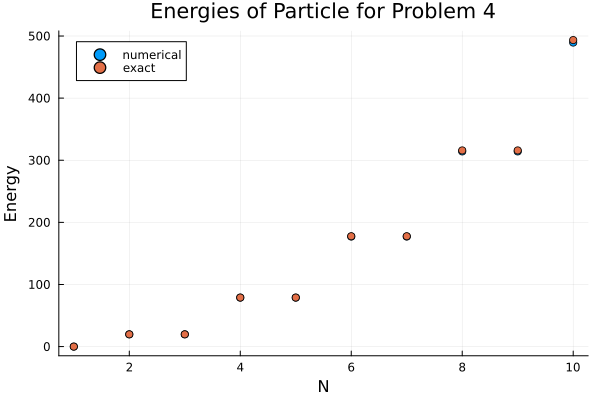

In [8]:
using Plots
theme(:default)
scatter([1:10],energies1[1:10],label="numerical",xlabel="N", ylabel="Energy", title="Energy vs N", legend=:topleft,ls=:dot)
scatter!([1:10],exact_energies1[1:10],label="exact",title="Energies of Particle for Problem 4",ls=:dot)


For the comparison of the exact vs. numerical resualts for a particle in a box
with the conditions $a=0$ & $b=1$ it can be seen that the numerical solution 
closely follows the exact with an absolute error of less than 100. However, while not being exact, when an exact solution is not available, the numerical solution can be an incredibly close estimate to the exact solution.

# Problem 4
# Key Equations
According to the 1D version of the Bloch’s theorem, the solution $\psi(x)$ of the Schrödinger equation for a periodic potential $U(x + L) = U(x)$ is of the form
$$
\psi(x) = e^{ikx} u(x),
$$
where $u(x + L) = u(x)$ is a periodic function and the real parameter $k$ is called the crystal momentum vector.

If this form for $\psi(x)$ is substituted back into the Schrödinger equation, we yield:
$$
 \left[\frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 + U(x) \right] u_n(x) = E_n(k) u_n(x).
$$

In other words, to find the electronic bands $E_n(k)$, where $n$ is known as the band index and $-\pi / L \leq k \leq\pi / L$, we need to find the eigenenergies  for the following Schrödinger equation with the periodic boundary condition

$$
 \left[-\frac{1}{2}\frac{d^2}{dx^2} -ik\frac{d}{dx}  + \frac{k^2}{2} + U(x) \right] u_n(x) = E_n(k) u_n(x).
 \qquad\qquad 
$$

We will use the central finite difference method to calculate $E_n(k)$ as a function of $k$ for $n=1$ and $n=2$. $U(x)=\cos(x)$, $0 \leq x < L$, and $L=2\pi$. Plot  these $E_{1,2}(k)$.


## Solution
Given the following central difference methods:
$$
f'(x) = [ f(x+\Delta x/2) - f(x-\Delta x/2) ] / \Delta x = f'(x) + O\Delta x^2 \\
	f''(x) = [ f'(x+\Delta x/2) - f'(x-\Delta x/2) ] / \Delta x  = [ f(x + \Delta x) - 2f(x) + f(x- \Delta x)] / \Delta x^2  + O\Delta x^2)
$$
The given schrodinger equation becomes:
$$
\frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{2\Delta x^2}-\frac{f(x+\Delta x) - f(x-\Delta x)}{ 2\Delta x}+[(\frac{k^2}{2})+cos(x)]u_n(x)=E_n(k)u_n(x)$$

Translating this to a wavefunction yields:
$$
\frac{\psi(x_{N+1})-2\psi(x_{N})+\psi(x_{N-1})}{\frac{1}{2}\Delta x^2}-\frac{ik}{2\Delta x}[(\psi(x_{N+1})-\psi(x_{N-1})]+[(\frac{k^2}{2})+cos(x_N)]\psi(x_N)=E_n(k)$$



Now imposing periodic boundary conditions of 
$$
    \psi(x_1) = \psi(x_{N+1}).
$$
and 
$$\psi(x_{0}) = \psi(x_{N+1}) = 0$$
Yields the following:
$$
\frac{\psi(x_{1})-2\psi(x_{N})+\psi(x_{N-1})}{\frac{1}{2}\Delta x^2}-\frac{ik}{2\Delta x}[(\psi(x_{1})-\psi(x_{N-1})]+[(\frac{k^2}{2})+cos(x_N)]\psi(x_N)=E_n(k)$$
Now this is expressed via matrix by the following function:

In [24]:
using LinearAlgebra
function prob_4_energies(U::Function,a::Real,b::Real,N::Real,k::Real)
    m=range(1,N,N)
    x=a.+((m.-1).*(b-a))./N
    Δx = x[2] - x[1]
    for t in 1:N
    var1=(1 ./ (2 * Δx^2))
    var2=((im * k)./ (2 * Δx^2))
    hamiltonian=(diagm(
        -1    => var1 * ones(N-1),
        0    => var1 * ones(N),
        1    => - var1 * ones(N-1),
        N-1  => var1 * ones(1),
        -N+1 => - var1 * ones(1) )
        +
        diagm(
        -1   => var2 * ones(N-1),
        0    => 0 * ones(N),
        1   => - var2 * ones(N-1),
        N-1  => var2 * ones(1),
        -N+1 => - var2 * ones(1) )
        )
       
        hamiltonian += diagm(U.(x))  .+(k^2)/2 .+cos.(x)
    end
    return eigvals(hamiltonian)
    end

prob_4_energies (generic function with 1 method)

In [25]:
L=2*pi
N=100
k=range(-pi/L,pi/L,N)
lev1=zeros(N)
lev2=zeros(N)
for i in 1:N
    energies4=zeros(N)
    energies4=prob_4_energies(x -> 0,0,1,N,k[i])
energies4= real.(energies4)
lev1[i]=energies4[1]
lev2[i]=energies4[2]
end


LoadError: UndefVarError: hamiltonian not defined

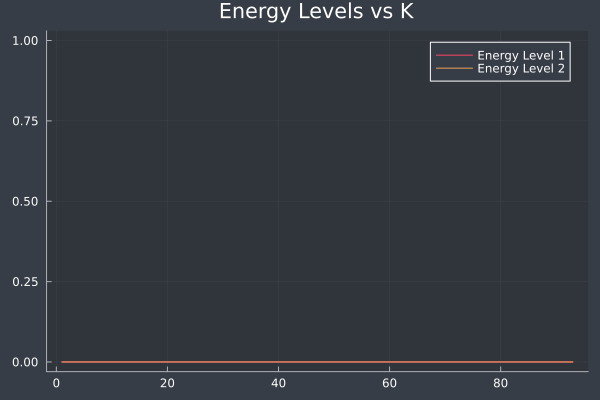

In [26]:
## Plotting
theme(:dark)
using Plots
plot(lev1[4:96],label="Energy Level 1",title="Energy Levels vs K")
plot!(lev2[4:96],label="Energy Level 2")

# Problem 5
# Key Equations
Using the same system as in Question 4, we will seek the numerical solution of equation (1) by expanding the unknown eigenfunction $u(x)$ using the following basis:
$$
u(x) = \sum_{q=-\infty}^{\infty} a_q f_q(x), \qquad f_q(x) = \frac{\exp(ixq)}{\sqrt{2\pi}}.
 \qquad\qquad 
$$

The orthogonality condition for the basis $\{f_q(x)\}$ reads
$$
    \int_0^{2\pi} f_m(x)^* f_q(x) dx = \delta_{m, q},
$$


Energy Equations

$$
    KE_{m,q} = \int_0^{2\pi} f_m(x)^* \left(-\frac{1}{2}\frac{d^2}{dx^2} -ik\frac{d}{dx}  + \frac{k^2}{2} \right) f_q(x) dx.
$$

$$
    PE_{m,q} = \int_0^{2\pi} f_m(x)^* \cos(x) f_q(x) dx.
$$


We start with equation (1) from the previous problem.
$$
 \left[\frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 + U(x) \right] u_n(x) = E_n(k) u_n(x).
$$


The basis is given as :
$$
u(x) = \sum_{q=-\infty}^{\infty} a_q f_q(x)
$$
Dropping the equation into our provided basis...
$$
 \left[\frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 * u_q(x) + U(x) * u_q(x) \right ] = E_n(k) u_n(x). ---->
$$
and
$$
 \sum_{q=-\infty}^{\infty} a_q (\left[\frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 * f_q(x)) + U(x) * f_q(x) \right ]) = E_n(k) \sum_{q=-\infty}^{\infty} a_q f_q(x).
$$
Multiplying both sides by $\int_0^{2\pi} f_m(x) dx$
$$
 \sum_{q=-\infty}^{\infty} a_q (\left[\frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 * f_q(x)) * \int_0^{2\pi} f_m(x) dx + U(x) * f_q(x) * \int_0^{2\pi} f_m(x) dx \right ]) = \int_0^{2\pi} f_m(x) dx * E_n(k) \sum_{q=-\infty}^{\infty} a_q f_q(x).
$$


The potential energy is given by:
$$
    PE_{m,q} = \int_0^{2\pi} f_m(x)^* U(x) * f_q(x) dx. =  U(x) * f_q(x) * \int_0^{2\pi} f_m(x) dx
$$
   Because of the othogonal condition, $ \int_0^{2\pi} f_m(x)^* f_q(x) dx = \delta_{m, q}$, the potential energy becomes:
$$=\frac{1}{h_m} * \int_0^{2\pi} H_m(x) * U(x) * H_q(x) dx * e^{-x^2}$$

Kinetic Energy is expressed by:
$$
    KE_{m,q} = \int_0^{2\pi} f_m(x)^* \left(-\frac{1}{2}\frac{d^2}{dx^2} -ik\frac{d}{dx}  + \frac{k^2}{2} \right) f_q(x) dx =  \frac{1}{2} \left(-i\frac{d}{dx} + k\right)^2 * f_q(x)) * \int_0^{2\pi} f_m(x) dx 
$$

$$
    KE_{m,q} = \int_0^{2\pi} f_m(x)^* \left(-\frac{1}{2h_m}\frac{d}{dx} * f_q(x)  -ik * \Delta f_q(x) + \frac{k^2 f_q(x)dx}{2} \right)
$$


Using Integration by parts:
$$
\int {u\frac{{dv}}{{dx}}} dx = uv - \int {\frac{{du}}{{dx}}} vdx
$$
Yields:
$$
KE_{m,q} = \frac{1}{2h_m} ( \frac{dH_m(x)}{dx}   e^{-x^2/2} *  \frac{dH_q(x)}{dx}  e^{-x^2/2}) -  \frac{ik}{h_m} * \int_0^{2\pi} \frac{dH_m(x)e^{-x^2/2}}{dx} * H_q(x)e^{-x^2/2} +  \int_0^{2\pi} * \frac{k^2 * H_q e^{-x^2/2}* \Delta x * H_m e^{-x^2/2}}{2h_m} 
$$